# WATER POTABILITY PROJECT (USING KNN)
# (AI LAB  F-5)
# Teacher: Mam Anaba Shafiq
# GROUP 2
# Mustehsan Farooq     L1-F21-BSCS-0688
# jamila Fatima              L1-F21-BSCS-1065

                            COMPLETE CODE

Head of the dataset:
         ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0       NaN  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246         NaN    592.885359   
2  8.099124  224.236259  19909.541732     9.275884         NaN    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436524       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0  

Tail of the dataset:
            ph    Hardness        Solids  Chloramines     Sulfate  \
3271  4.668102  193.681735  47580.991603     7.

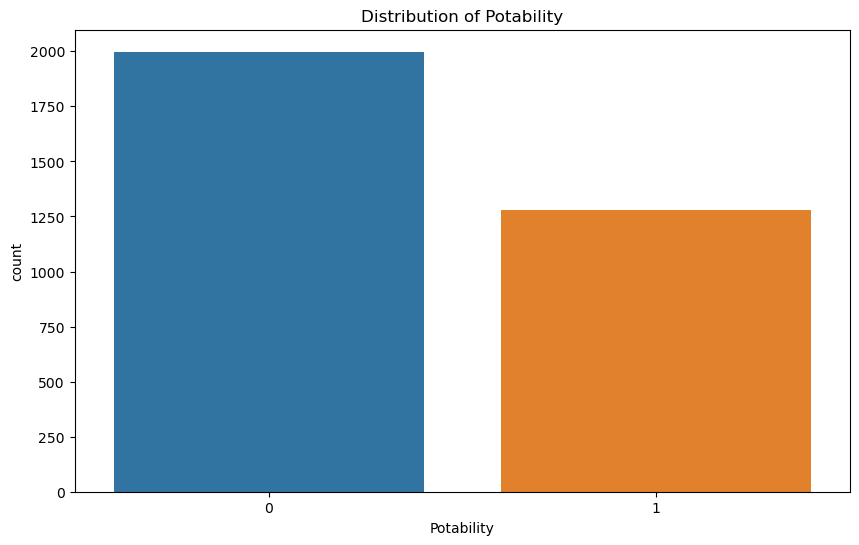


Number of missing values in each column after preprocessing:
ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

Correlation Matrix:
                       ph  Hardness    Solids  Chloramines   Sulfate  \
ph               1.000000  0.075833 -0.081884    -0.031811  0.014403   
Hardness         0.075833  1.000000 -0.046899    -0.030054 -0.092766   
Solids          -0.081884 -0.046899  1.000000    -0.070148 -0.149840   
Chloramines     -0.031811 -0.030054 -0.070148     1.000000  0.023791   
Sulfate          0.014403 -0.092766 -0.149840     0.023791  1.000000   
Conductivity     0.017192 -0.023915  0.013831    -0.020486 -0.014059   
Organic_carbon   0.040061  0.003610  0.010242    -0.012653  0.026909   
Trihalomethanes  0.002994 -0.012690 -0.008875     0.016627 -0.025605   
Turbidity       -0.036222 -0.014449  0.019546 

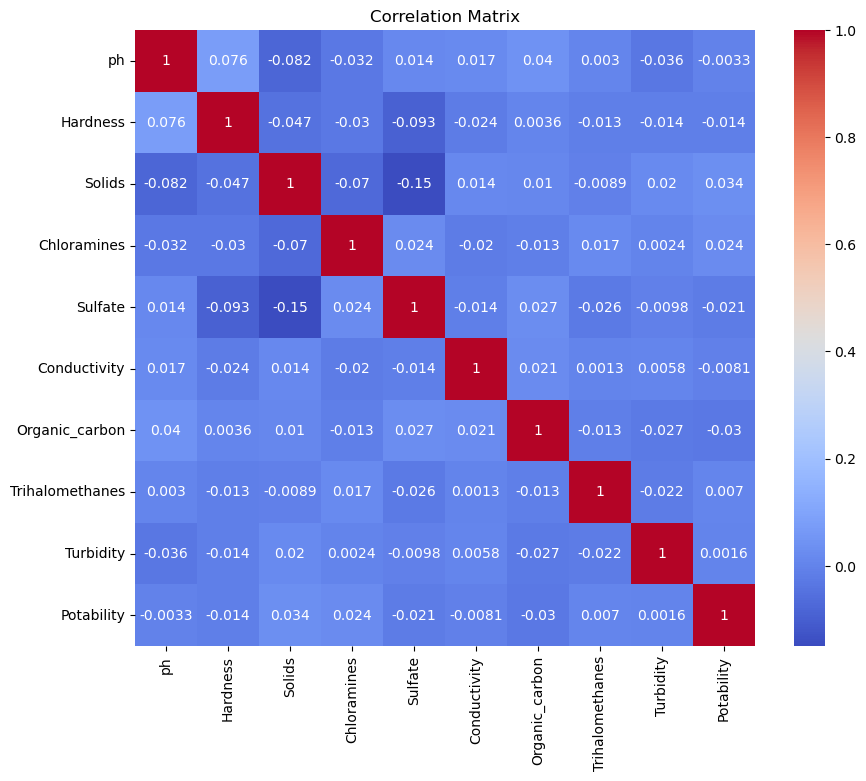

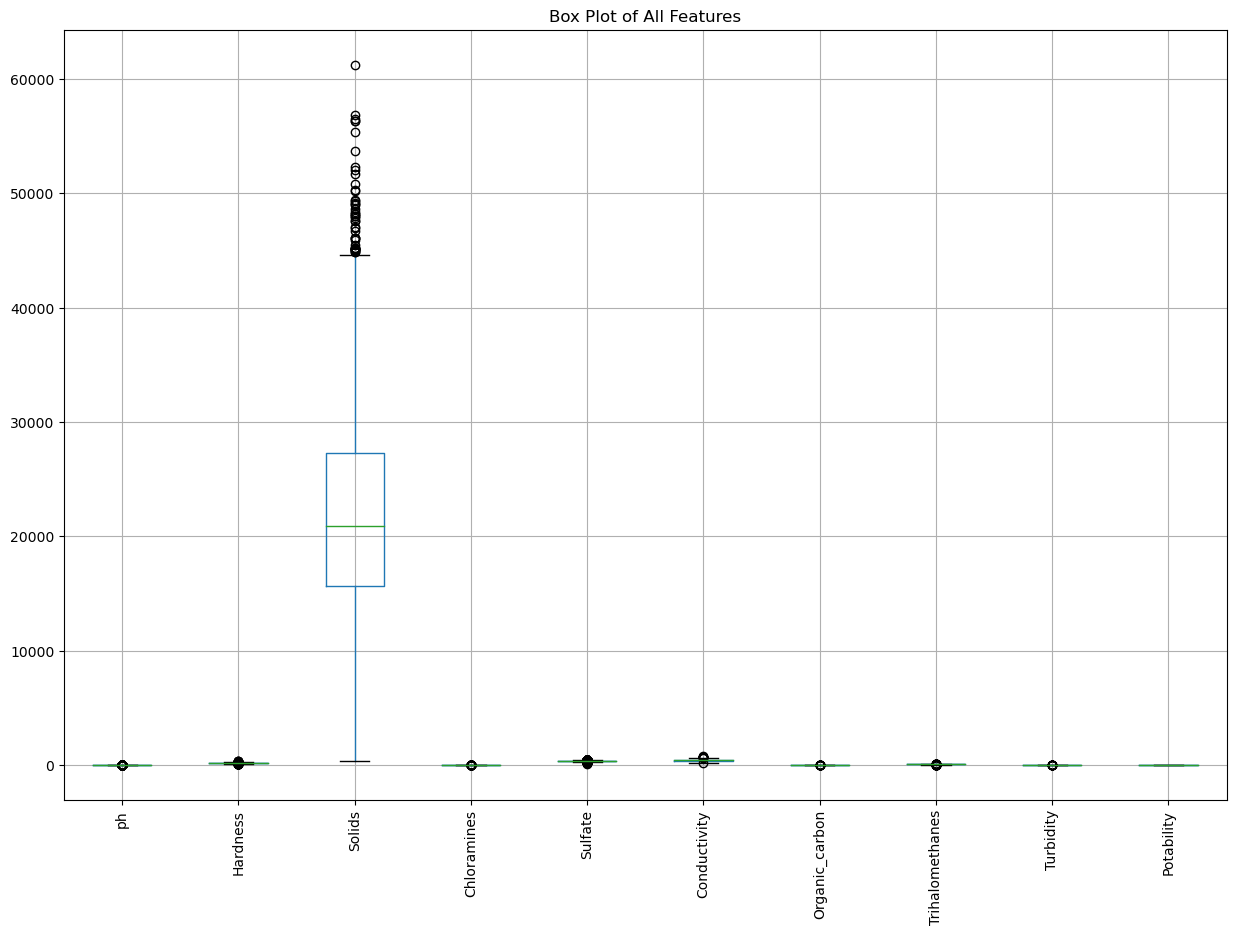

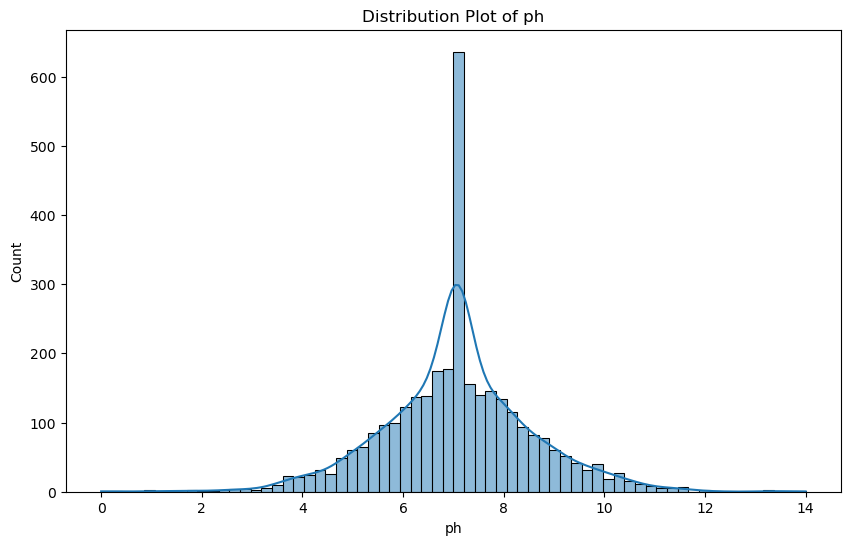

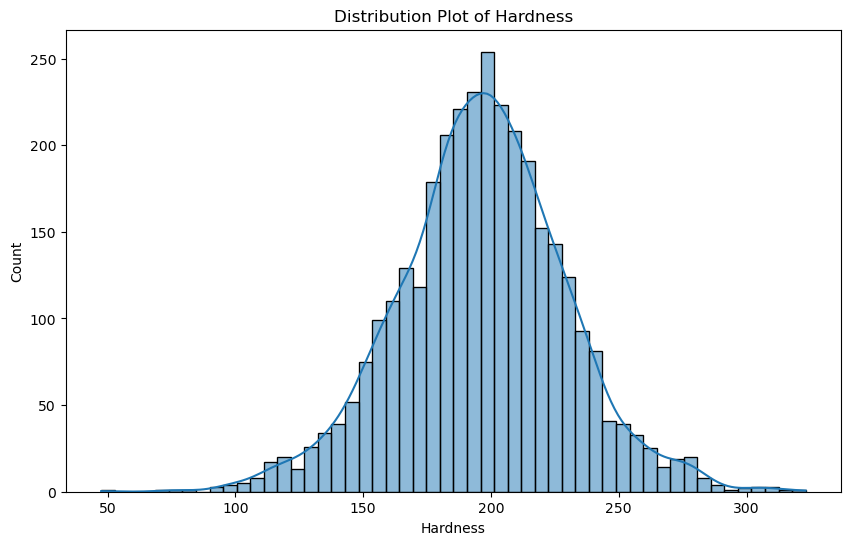

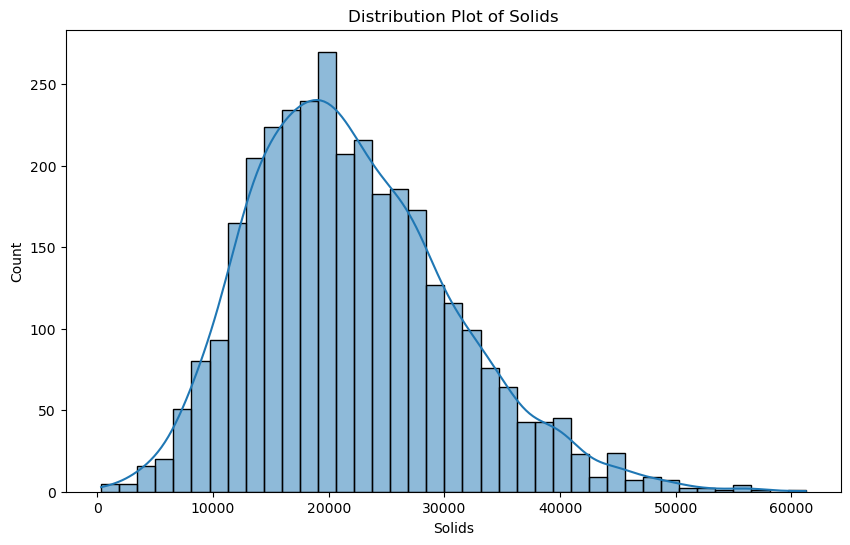

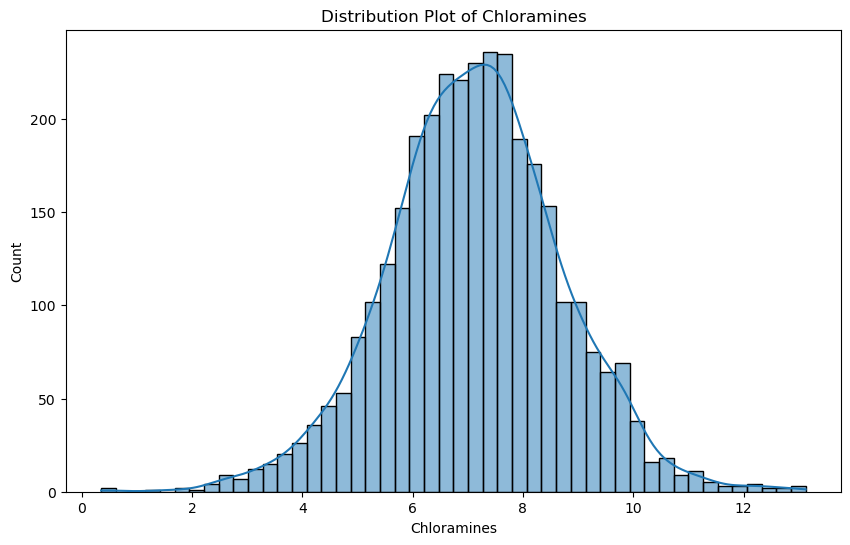

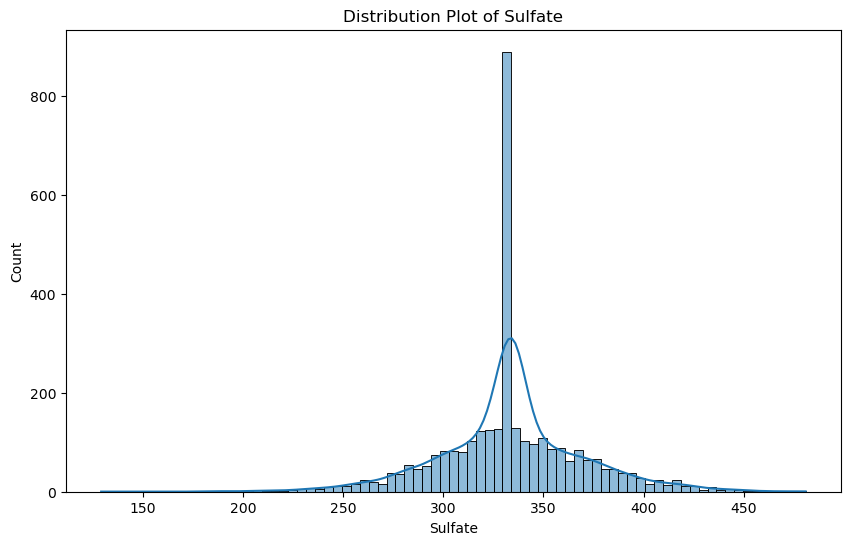

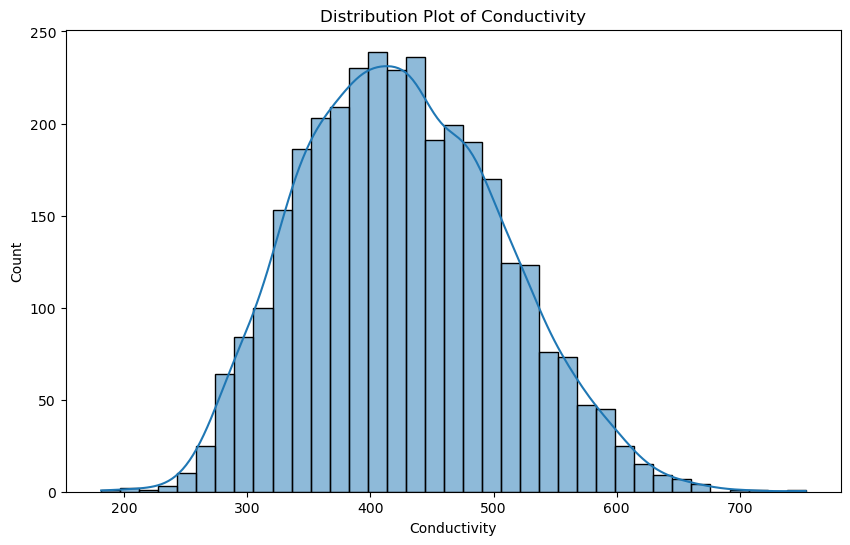

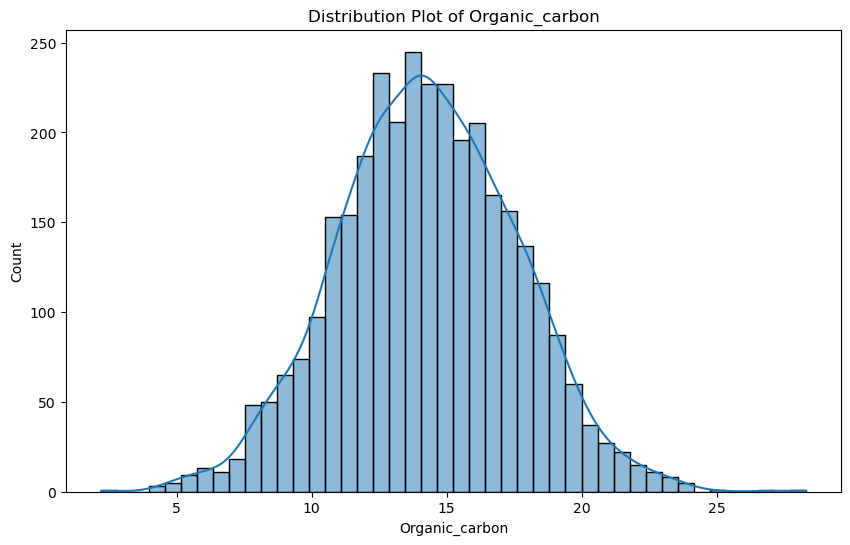

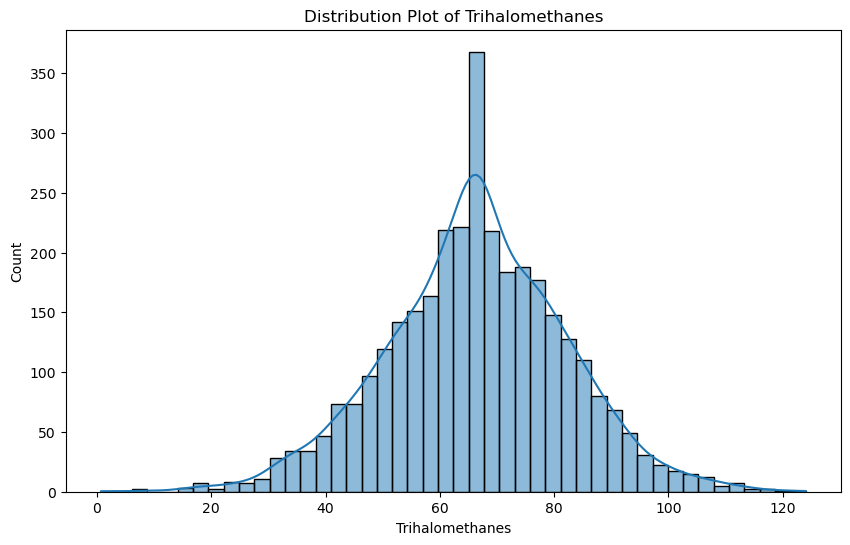

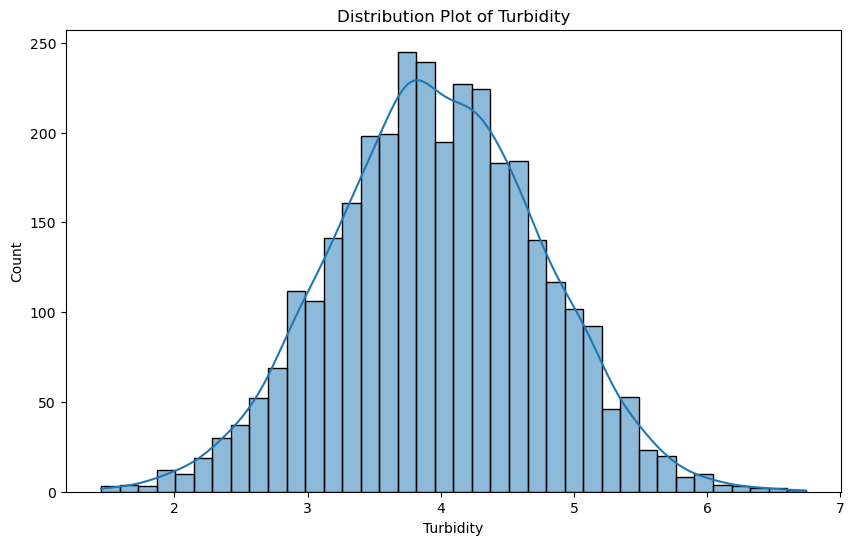

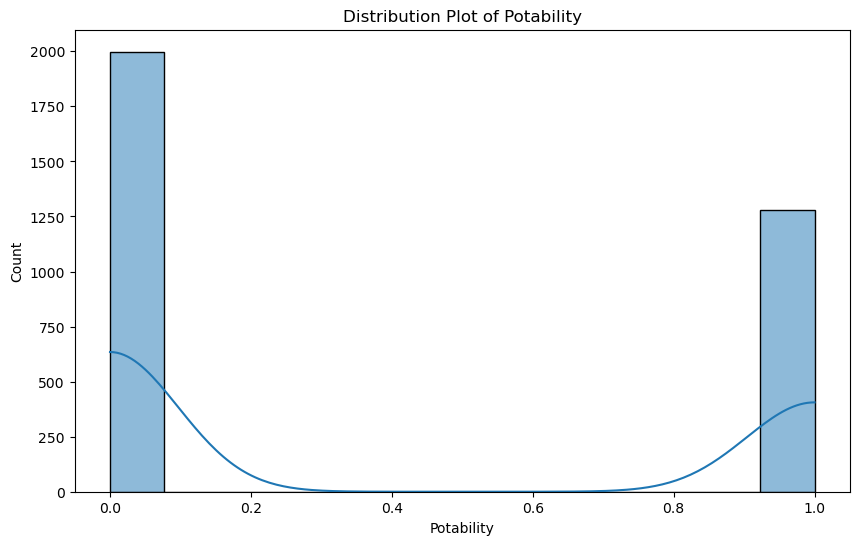


First few rows of the scaled dataset:
         ph  Hardness    Solids  Chloramines   Sulfate  Conductivity  \
0  0.505771  0.571139  0.336096     0.543891  0.680385      0.669439   
1  0.265434  0.297400  0.300611     0.491839  0.581699      0.719411   
2  0.578509  0.641311  0.321619     0.698543  0.581699      0.414652   
3  0.594055  0.605536  0.356244     0.603314  0.647347      0.317880   
4  0.649445  0.484851  0.289922     0.484900  0.514545      0.379337   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0        0.313402         0.699753   0.286091         0.0  
1        0.497319         0.450999   0.576793         0.0  
2        0.562017         0.532866   0.303637         0.0  
3        0.622089         0.808065   0.601015         0.0  
4        0.358555         0.253606   0.496327         0.0  

Accuracy of the KNN model: 0.65

Classification Report:
              precision    recall  f1-score   support

         0.0       0.69      0.79      0.74       412
  

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


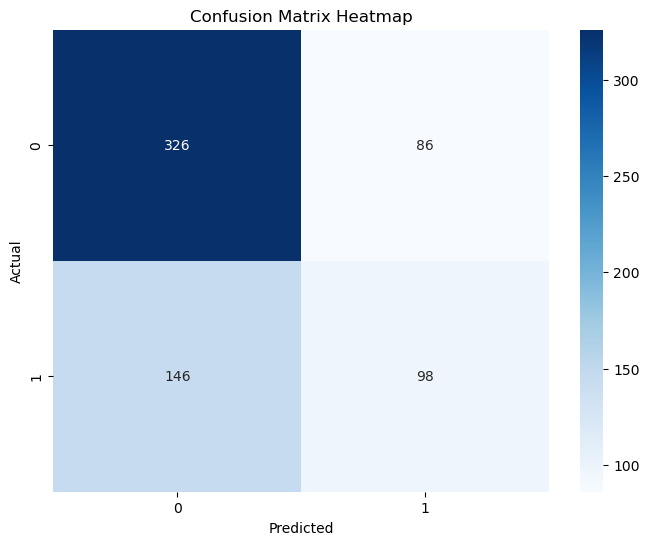

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Step 1: Read Dataset
file_path = 'water_potability.csv'  # Path to the dataset file
df = pd.read_csv(file_path)  # Reading the dataset into a DataFrame

print("Head of the dataset:")
print(df.head())  # Displaying the first 5 rows of the dataset

print("\nTail of the dataset:")
print(df.tail())  # Displaying the last 5 rows of the dataset

print("\nShape of the dataset:")
print(df.shape)  # Displaying the shape (number of rows and columns) of the dataset

print("\nInfo of the dataset:")
print(df.info())  # Displaying information about the dataset, such as column names, non-null counts, and data types

print("\nDescription of the dataset:")
print(df.describe())  # Displaying statistical summary of the dataset

print("\nUniqueness of values in each column:")
print(df.nunique())  # Displaying the number of unique values in each column

for column in df.columns:
    print(f"\nValue counts for {column}:")
    print(df[column].value_counts())  # Displaying the count of unique values in each column

# Step 2: Exploratory Data Analysis
plt.figure(figsize=(10, 6))
sns.countplot(x='Potability', data=df)
plt.title("Distribution of Potability")
plt.show()

# Step 3: Preprocessing
df['ph'].fillna(df['ph'].mean(), inplace=True)
df['Sulfate'].fillna(df['Sulfate'].mean(), inplace=True)
df['Trihalomethanes'].fillna(df['Trihalomethanes'].mean(), inplace=True)

df.drop_duplicates(inplace=True)

print("\nNumber of missing values in each column after preprocessing:")
print(df.isna().sum())

# Step 4: Feature Engineering
print("\nCorrelation Matrix:")
correlation_matrix = df.corr()
print(correlation_matrix)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

plt.figure(figsize=(15, 10))
df.boxplot()
plt.title("Box Plot of All Features")
plt.xticks(rotation=90)
plt.show()

for column in df.columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[column], kde=True)
    plt.title(f"Distribution Plot of {column}")
    plt.show()

scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

print("\nFirst few rows of the scaled dataset:")
print(df_scaled.head())

# Step 5: Implementation of Model
X = df_scaled.drop('Potability', axis=1)
y = df_scaled['Potability']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

# Step 6: Evaluation of Model
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy of the KNN model: {accuracy:.2f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Step 7: Visualization of Results
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix Heatmap")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


# Step by Step code 

In [3]:
# Import necessary libraries
import pandas as pd

# Load the dataset
file_path = 'water_potability.csv'  # Path to the dataset file
df = pd.read_csv(file_path)  # Reading the dataset into a DataFrame

# Display the first few rows of the dataset
print("Head of the dataset:")
print(df.head())  # Displaying the first 5 rows of the dataset

# Display the last few rows of the dataset
print("\nTail of the dataset:")
print(df.tail())  # Displaying the last 5 rows of the dataset

# Display the shape of the dataset
print("\nShape of the dataset:")
print(df.shape)  # Displaying the shape (number of rows and columns) of the dataset

# Display the information about the dataset
print("\nInfo of the dataset:")
print(df.info())  # Displaying information about the dataset, such as column names, non-null counts, and data types

# Display the description of the dataset
print("\nDescription of the dataset:")
print(df.describe())  # Displaying statistical summary of the dataset

# Display the uniqueness of values in each column
print("\nUniqueness of values in each column:")
print(df.nunique())  # Displaying the number of unique values in each column

# Display the value counts for each column
for column in df.columns:
    print(f"\nValue counts for {column}:")
    print(df[column].value_counts())  # Displaying the count of unique values in each column


Head of the dataset:
         ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0       NaN  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246         NaN    592.885359   
2  8.099124  224.236259  19909.541732     9.275884         NaN    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436524       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0  

Tail of the dataset:
            ph    Hardness        Solids  Chloramines     Sulfate  \
3271  4.668102  193.681735  47580.991603     7.

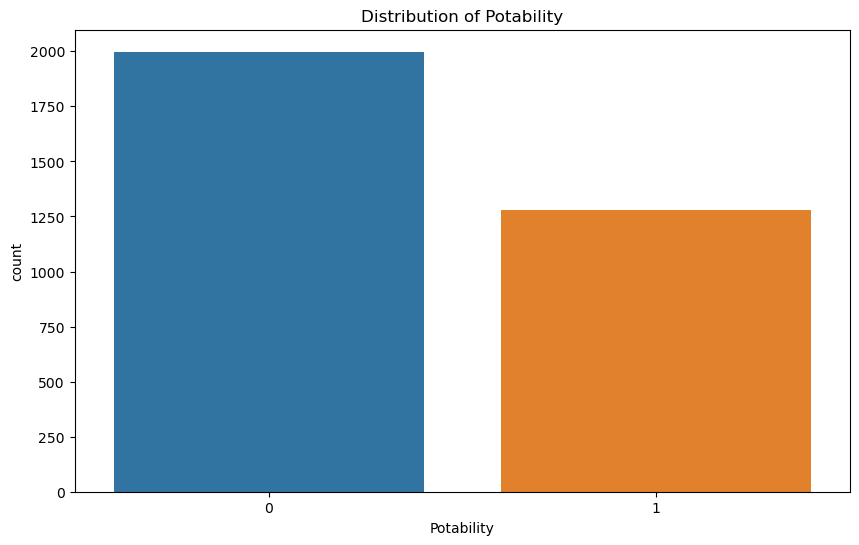

In [4]:
# Import necessary libraries for visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting the distribution of the target variable 'Potability'
plt.figure(figsize=(10, 6))
sns.countplot(x='Potability', data=df)
plt.title("Distribution of Potability")
plt.show()


In [5]:
# Fill missing values in 'ph', 'Sulfate', and 'Trihalomethanes' columns with their respective means
df['ph'].fillna(df['ph'].mean(), inplace=True)
df['Sulfate'].fillna(df['Sulfate'].mean(), inplace=True)
df['Trihalomethanes'].fillna(df['Trihalomethanes'].mean(), inplace=True)

# Remove duplicate rows from the dataset
df.drop_duplicates(inplace=True)

# Checking for remaining missing values in each column after preprocessing
print("\nNumber of missing values in each column after preprocessing:")
print(df.isna().sum())



Number of missing values in each column after preprocessing:
ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64



Correlation Matrix:
                       ph  Hardness    Solids  Chloramines   Sulfate  \
ph               1.000000  0.075833 -0.081884    -0.031811  0.014403   
Hardness         0.075833  1.000000 -0.046899    -0.030054 -0.092766   
Solids          -0.081884 -0.046899  1.000000    -0.070148 -0.149840   
Chloramines     -0.031811 -0.030054 -0.070148     1.000000  0.023791   
Sulfate          0.014403 -0.092766 -0.149840     0.023791  1.000000   
Conductivity     0.017192 -0.023915  0.013831    -0.020486 -0.014059   
Organic_carbon   0.040061  0.003610  0.010242    -0.012653  0.026909   
Trihalomethanes  0.002994 -0.012690 -0.008875     0.016627 -0.025605   
Turbidity       -0.036222 -0.014449  0.019546     0.002363 -0.009790   
Potability      -0.003287 -0.013837  0.033743     0.023779 -0.020619   

                 Conductivity  Organic_carbon  Trihalomethanes  Turbidity  \
ph                   0.017192        0.040061         0.002994  -0.036222   
Hardness            -0.023915   

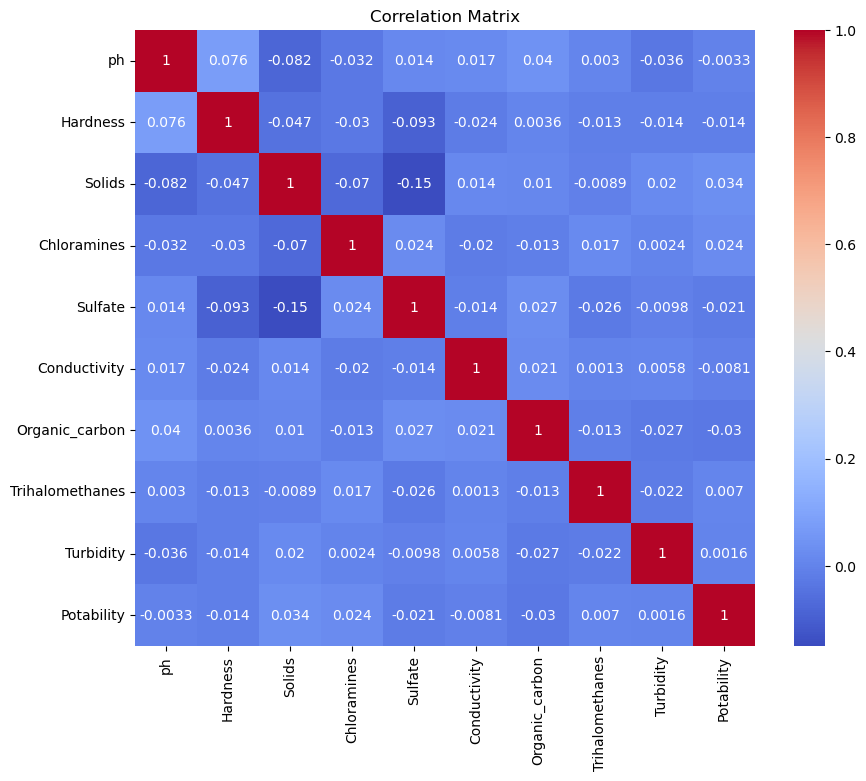

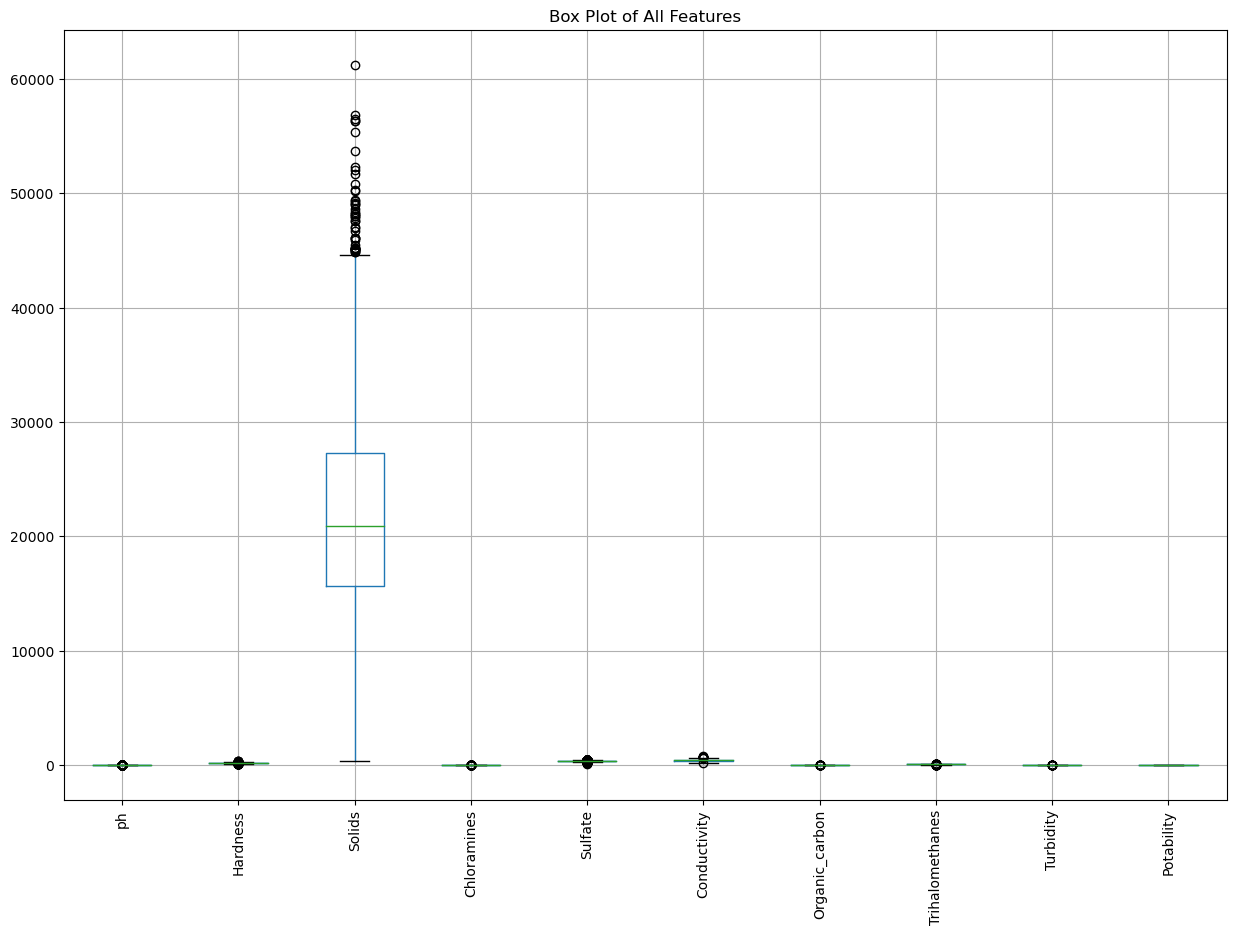

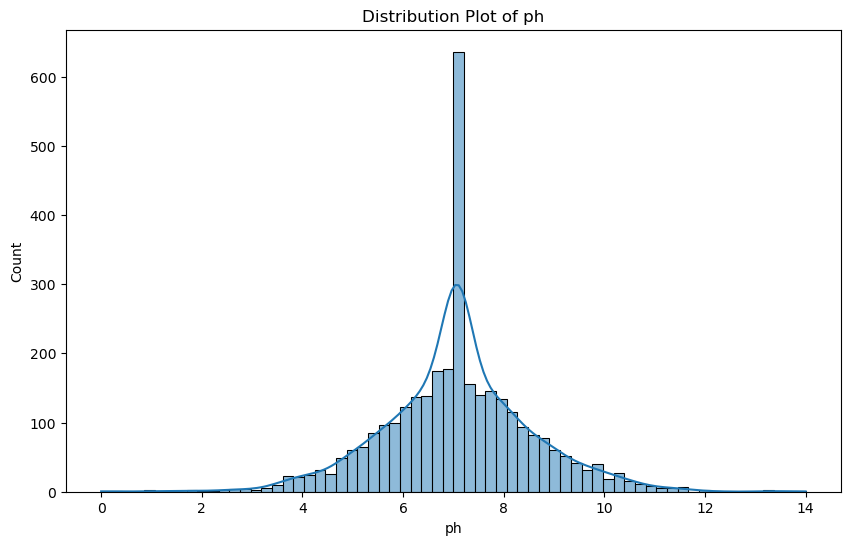

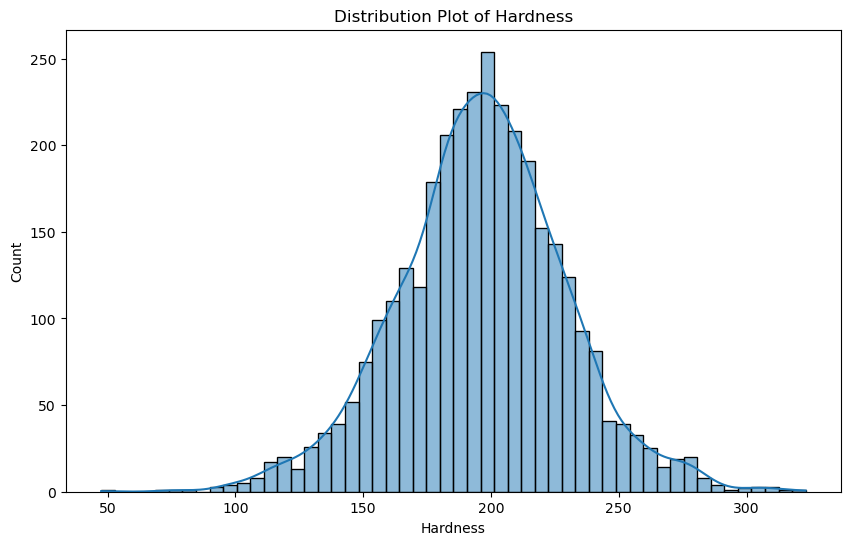

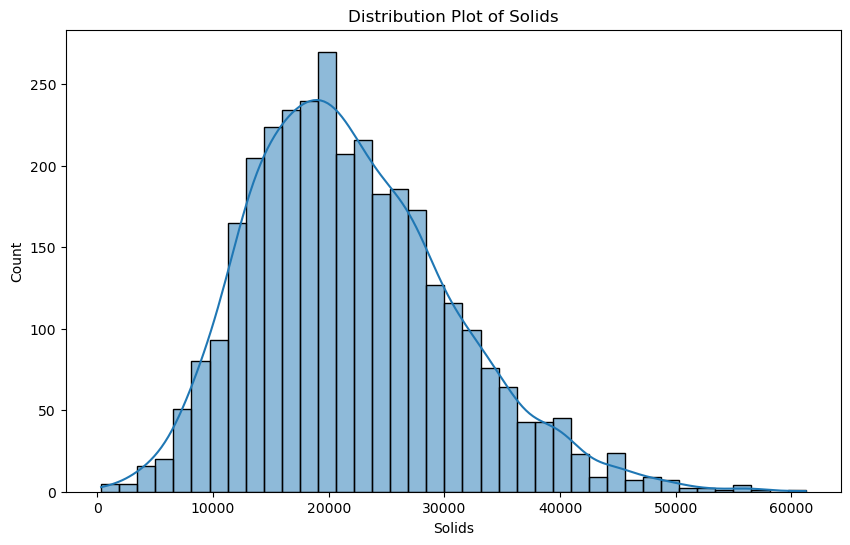

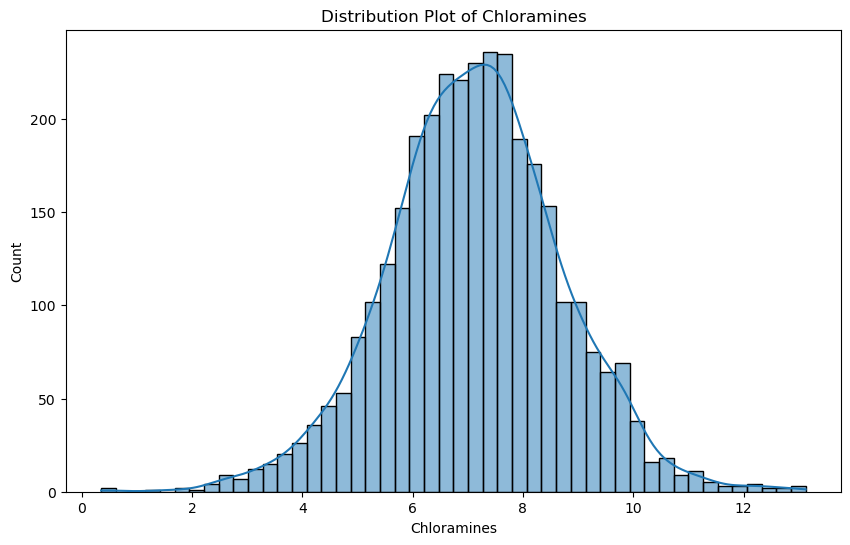

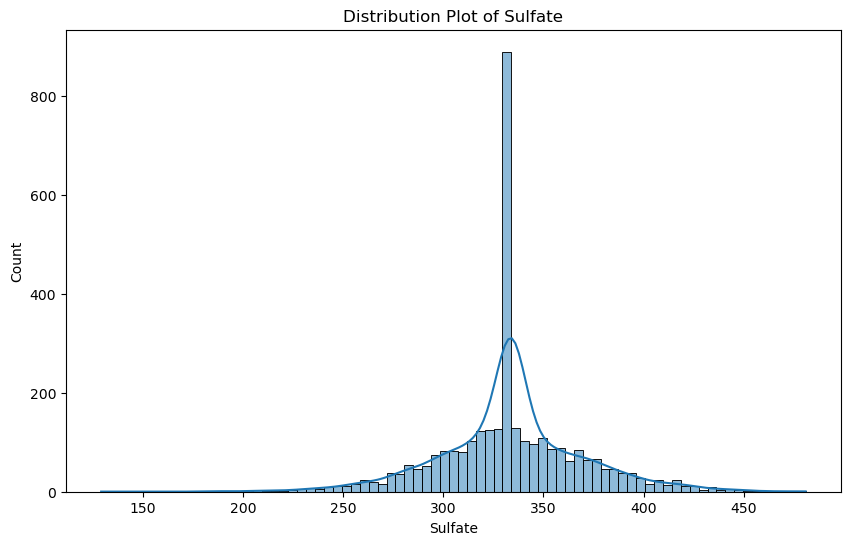

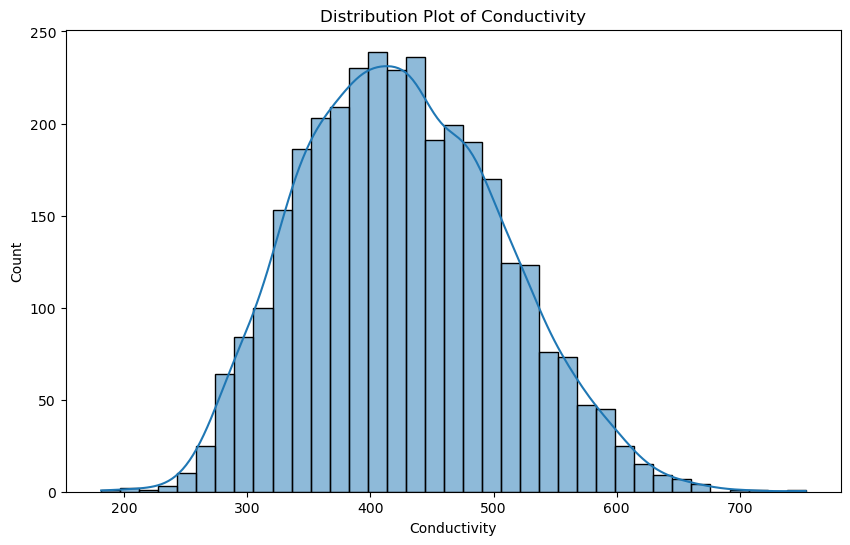

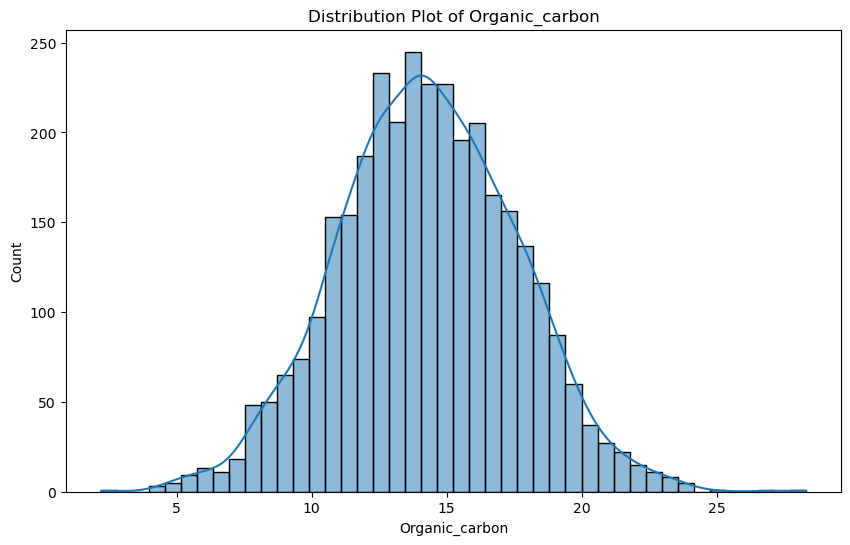

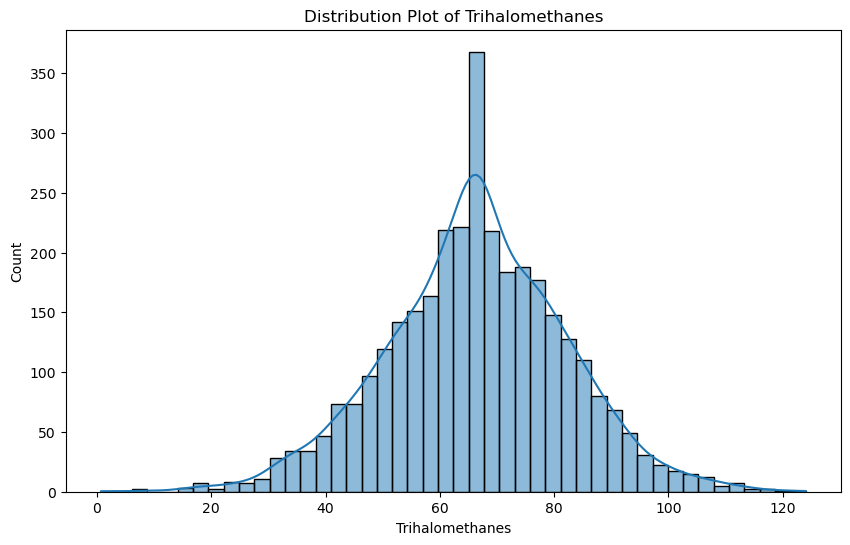

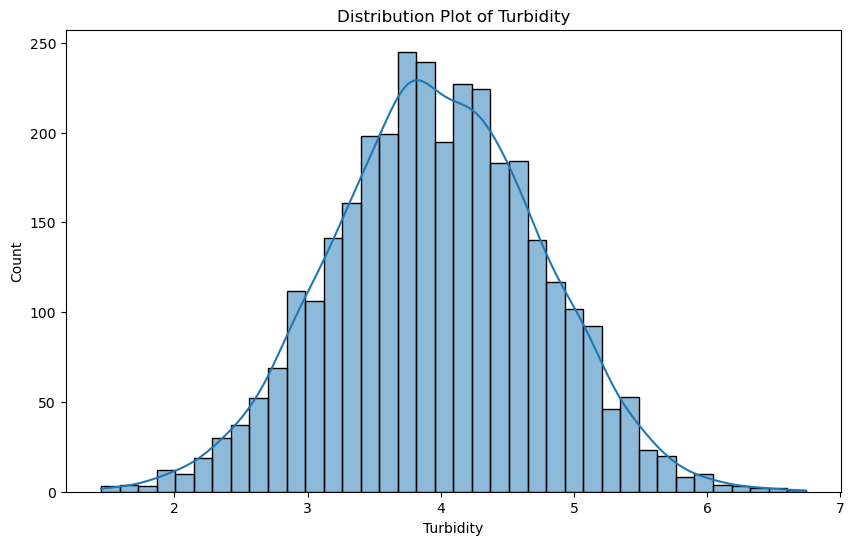

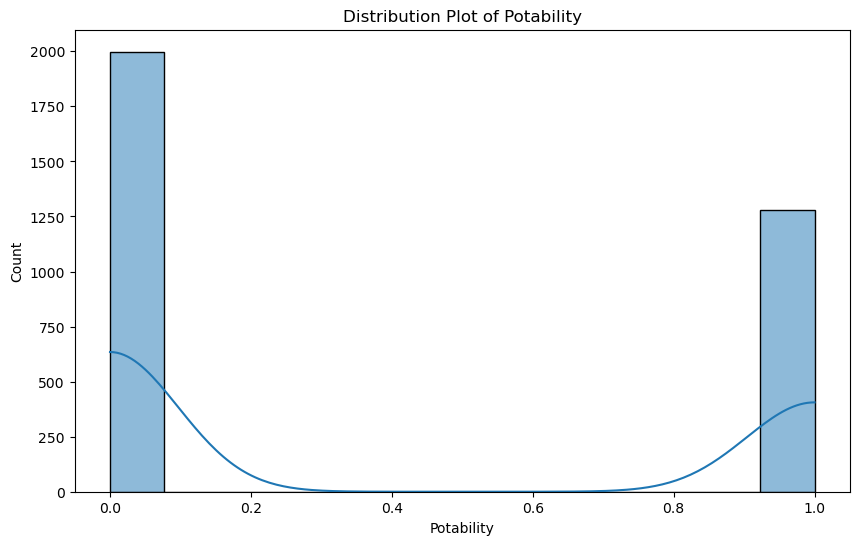


First few rows of the scaled dataset:
         ph  Hardness    Solids  Chloramines   Sulfate  Conductivity  \
0  0.505771  0.571139  0.336096     0.543891  0.680385      0.669439   
1  0.265434  0.297400  0.300611     0.491839  0.581699      0.719411   
2  0.578509  0.641311  0.321619     0.698543  0.581699      0.414652   
3  0.594055  0.605536  0.356244     0.603314  0.647347      0.317880   
4  0.649445  0.484851  0.289922     0.484900  0.514545      0.379337   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0        0.313402         0.699753   0.286091         0.0  
1        0.497319         0.450999   0.576793         0.0  
2        0.562017         0.532866   0.303637         0.0  
3        0.622089         0.808065   0.601015         0.0  
4        0.358555         0.253606   0.496327         0.0  


In [6]:
# Compute and display the correlation matrix
print("\nCorrelation Matrix:")
correlation_matrix = df.corr()
print(correlation_matrix)

# Plotting the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

# Plotting box plots for each feature to visualize the distribution and detect outliers
plt.figure(figsize=(15, 10))
df.boxplot()
plt.title("Box Plot of All Features")
plt.xticks(rotation=90)
plt.show()

# Plotting distribution plots for each feature
for column in df.columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[column], kde=True)
    plt.title(f"Distribution Plot of {column}")
    plt.show()

# Normalize the dataset using Min-Max Scaling
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

# Display the first few rows of the scaled dataset
print("\nFirst few rows of the scaled dataset:")
print(df_scaled.head())


In [23]:
# Import necessary libraries for model implementation
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# Splitting the data into features (X) and target (y)
X = df_scaled.drop('Potability', axis=1)
y = df_scaled['Potability']

# Splitting the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing the K-Nearest Neighbors (KNN) model with 5 neighbors
knn = KNeighborsClassifier(n_neighbors=5)

# Training the KNN model
knn.fit(X_train, y_train)


KNeighborsClassifier()

In [25]:
# Making predictions on the test set
y_pred = knn.predict(X_test)

# Import necessary libraries for evaluation
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Evaluating the accuracy of the KNN model
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy of the KNN model: {accuracy:.2f}")

# Displaying the classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Displaying the confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))



Accuracy of the KNN model: 0.65

Classification Report:
              precision    recall  f1-score   support

         0.0       0.69      0.79      0.74       412
         1.0       0.53      0.40      0.46       244

    accuracy                           0.65       656
   macro avg       0.61      0.60      0.60       656
weighted avg       0.63      0.65      0.63       656


Confusion Matrix:
[[326  86]
 [146  98]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


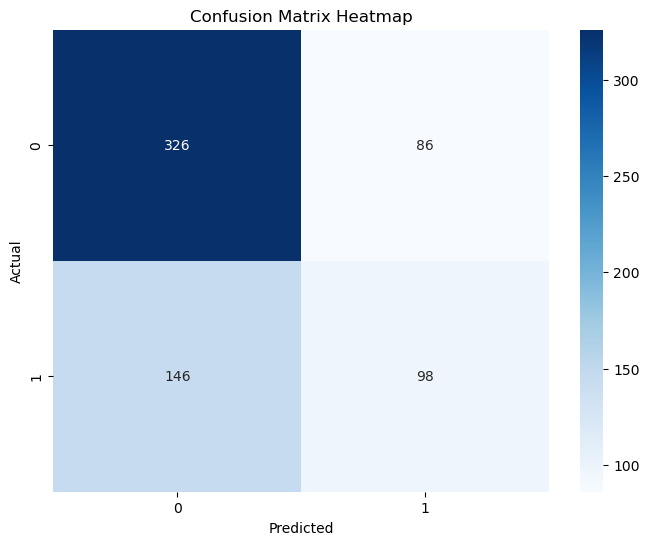

In [26]:
# Plotting the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix Heatmap")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
